In [1]:
import pandas_datareader.data as dr

In [2]:
import datetime

In [3]:
start = datetime.datetime(2010, 5, 5)

In [4]:
end = datetime.datetime(2016, 3, 29)

In [5]:
data = dr.DataReader("AAPL", "yahoo", start, end)

In [6]:
%matplotlib inline

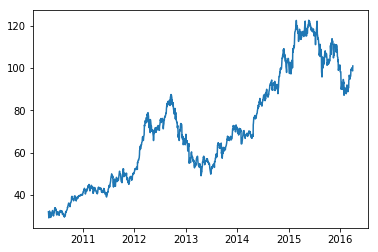

In [7]:
import matplotlib.pyplot as plt 
plt.plot(data.index, data['Adj Close'])

In [8]:
data = data[['Adj Close']]

In [9]:
data.columns = ['AAPL']

In [10]:
data = data.tz_localize('UTC')

In [11]:
data.head()

,AAPL
Date,
2010-05-04 00:00:00+00:00,32.077824
2010-05-05 00:00:00+00:00,31.744251
2010-05-06 00:00:00+00:00,30.536434
2010-05-07 00:00:00+00:00,29.248018
2010-05-10 00:00:00+00:00,31.496237


In [12]:
from zipline.api import order_target, record, symbol

In [13]:
def initialize(context):
    context.i = 0
    context.sym = symbol('AAPL')
    context.hold = False

In [14]:
def handle_data(context, data):
    context.i += 1
    if context.i < 20:
        return
    
    buy = False
    sell = False
    
    ma5 = data.history(context.sym, 'price', 5, '1d').mean()
    ma20 = data.history(context.sym, 'price', 20, '1d').mean()
    
    if ma5 > ma20 and context.hold == False:
        order_target(context.sym, 100)
        context.hold = True
        buy = True
    elif ma5< ma20 and context.hold == True:
        order_target(context.sym, -100)
        context.hold = False
        sell = True
        
    record(AAPL=data.current(context.sym, "price"), ma5=ma5, ma20=ma20, buy=buy, sell=sell)

In [15]:
from zipline.algorithm import TradingAlgorithm

In [16]:
algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)

In [17]:
result = algo.run(data)

C:\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.
C:\Anaconda3\envs\py35\lib\site-packages\empyrical\stats.py:711: RuntimeWarning: invalid value encountered in true_divide
  out=out,
C:\Anaconda3\envs\py35\lib\site-packages\empyrical\stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


In [18]:
type(result)

pandas.core.frame.DataFrame

In [19]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1486 entries, 2010-05-04 20:00:00+00:00 to 2016-03-29 20:00:00+00:00
Data columns (total 42 columns):
AAPL                       1467 non-null float64
algo_volatility            1485 non-null float64
algorithm_period_return    1486 non-null float64
alpha                      1375 non-null float64
benchmark_period_return    1486 non-null float64
benchmark_volatility       1485 non-null float64
beta                       1375 non-null float64
buy                        1467 non-null object
capital_used               1486 non-null float64
ending_cash                1486 non-null float64
ending_exposure            1486 non-null float64
ending_value               1486 non-null float64
excess_return              1486 non-null float64
gross_leverage             1486 non-null float64
long_exposure              1486 non-null float64
long_value                 1486 non-null float64
longs_count                1486 non-null int64
ma20           

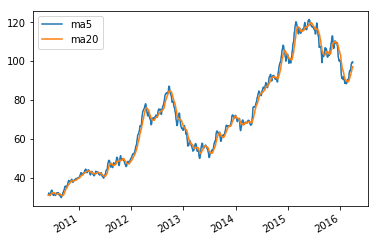

In [20]:
result[['ma5','ma20']].plot()

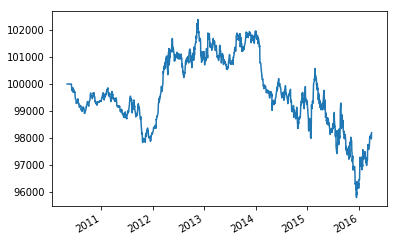

In [21]:
result['portfolio_value'].plot()

In [22]:
result['portfolio_value'].tail()

2016-03-22 20:00:00+00:00    98106.049622
2016-03-23 20:00:00+00:00    98050.746430
2016-03-24 20:00:00+00:00    98007.629670
2016-03-28 20:00:00+00:00    97962.639130
2016-03-29 20:00:00+00:00    98196.030701
Name: portfolio_value, dtype: float64